In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [268]:
df = pd.read_csv('kendaraan_train.csv')
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [269]:
df.drop(['id','Tertarik','Umur_Kendaraan','Kendaraan_Rusak'],axis=1,inplace=True)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,30503.0,124.0,270.0


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Premi              271262 non-null  float64
 6   Kanal_Penjualan    271532 non-null  float64
 7   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), object(1)
memory usage: 17.4+ MB


In [271]:
df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [272]:
df.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [273]:
Lamaberlanggan = df['Lama_Berlangganan']
premi= df['Premi']

dataclean = pd.DataFrame({
    'Lama_Berlangganan': Lamaberlanggan,
    'Premi' : premi,
})

datapercobaan


,Umur,Premi
0,10,28029.0
1,28,25800.0
2,1,32733.0
3,38,2630.0
4,30,34857.0
...,...,...
285826,3,25988.0
285827,1,44686.0
285828,3,49751.0
285829,48,30503.0


In [274]:
datakosong = df.isnull()
for column in datakosong.columns.values.tolist():
  print(column)
  print(datakosong[column].value_counts())
  print("")

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64

Umur
False    271617
True      14214
Name: Umur, dtype: int64

SIM
False    271427
True      14404
Name: SIM, dtype: int64

Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64

Premi
False    271262
True      14569
Name: Premi, dtype: int64

Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64



In [275]:
df['Jenis_Kelamin'].mode()
df['Umur'].mode()
df['SIM'].mode()
df['Sudah_Asuransi'].mode()
df['Kanal_Penjualan'].mode()
df['Kode_Daerah'].mode()
df['Premi'].mode()
df['Lama_Berlangganan'].mode()

0    158.0
dtype: float64

In [276]:
df['Jenis_Kelamin'].replace(np.nan,"Pria", inplace=True)
df['Umur'].replace(np.nan,"25",inplace = True)
df['Kode_Daerah'].replace(np.nan,'28.0',inplace=True)
df['SIM'].replace(np.nan,'1.0',inplace=True)
df['Sudah_Asuransi'].replace(np.nan,'0.0',inplace=True)

In [277]:
rkanal = df['Kanal_Penjualan'].astype('float').mean(axis=0)
rpremi = df['Premi'].astype('float').mean(axis=0)
rlangganan = df['Lama_Berlangganan'].astype('float').mean(axis=0)

df['Kanal_Penjualan'].replace(np.nan,rkanal,inplace=True)
df['Premi'].replace(np.nan,rpremi,inplace=True)
df['Lama_Berlangganan'].replace(np.nan,rkanal,inplace=True)

In [278]:
datakosong = df.isnull()
for column in datakosong.columns.values.tolist():
  print(column)
  print(datakosong[column].value_counts())
  print("")

Jenis_Kelamin
False    285831
Name: Jenis_Kelamin, dtype: int64

Umur
False    285831
Name: Umur, dtype: int64

SIM
False    285831
Name: SIM, dtype: int64

Kode_Daerah
False    285831
Name: Kode_Daerah, dtype: int64

Sudah_Asuransi
False    285831
Name: Sudah_Asuransi, dtype: int64

Premi
False    285831
Name: Premi, dtype: int64

Kanal_Penjualan
False    285831
Name: Kanal_Penjualan, dtype: int64

Lama_Berlangganan
False    285831
Name: Lama_Berlangganan, dtype: int64



In [279]:
objek =df.select_dtypes(['object']).columns
category = df.select_dtypes(['category']).columns
df[objek]=df[objek].apply(lambda x:x.astype('category'))

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Jenis_Kelamin      285831 non-null  category
 1   Umur               285831 non-null  category
 2   SIM                285831 non-null  category
 3   Kode_Daerah        285831 non-null  category
 4   Sudah_Asuransi     285831 non-null  category
 5   Premi              285831 non-null  float64 
 6   Kanal_Penjualan    285831 non-null  float64 
 7   Lama_Berlangganan  285831 non-null  float64 
dtypes: category(5), float64(3)
memory usage: 7.9 MB


In [281]:
df[objek]=df[objek].apply(lambda x:x.cat.codes)
df[category]=df[category].apply(lambda x:x.cat.codes)

In [282]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,10,1,33,1,28029.0,152.0,97.0
1,0,28,1,39,0,25800.0,29.0,158.0
2,0,1,1,46,1,32733.0,160.0,119.0
3,1,38,1,48,0,2630.0,124.0,63.0
4,0,30,1,35,0,34857.0,88.0,194.0


In [283]:
Lamaberlanggan = df['Lama_Berlangganan']
premi = df['Premi']

datacluster = pd.DataFrame({
    'Lama_Berlangganan' : Lamaberlanggan,
    'Premi' : premi,    
})

dataOut = datacluster
datacluster

,Lama_Berlangganan,Premi
0,97.0,28029.0
1,158.0,25800.0
2,119.0,32733.0
3,63.0,2630.0
4,194.0,34857.0
...,...,...
285826,217.0,25988.0
285827,50.0,44686.0
285828,226.0,49751.0
285829,270.0,30503.0


<Figure size 4320x4320 with 0 Axes>

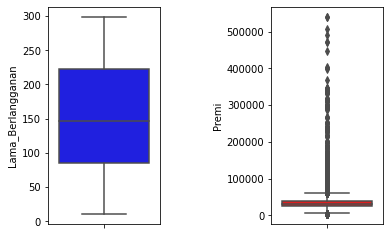

In [284]:
def cekout(data):
  plt.figure(figsize=(60,60))
  f , axes = plt.subplots(1,2)
  sns.boxplot(y= data['Lama_Berlangganan'],ax=axes[0],color='blue')
  sns.boxplot(y= data['Premi'],ax=axes[1],color='Red')
  plt.subplots_adjust(wspace=1)

cekout(datacluster)

In [285]:
while True:
  Q1, Q3 = np.percentile(df['Premi'],[25,75])
  IQR = Q3 - Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  outlo = df[(df['Premi'] < (lower)) | (df['Premi'] > (upper))]
  print('jumlah outlier data', outlo.shape[0])
  idxlo = outlo.index
  df.drop(idxlo, inplace=True)
  if (outlo.shape[0] <= 0):
    break

df['Premi'].describe()

jumlah outlier data 55141
jumlah outlier data 3626
jumlah outlier data 1173
jumlah outlier data 385
jumlah outlier data 133
jumlah outlier data 52
jumlah outlier data 19
jumlah outlier data 13
jumlah outlier data 2
jumlah outlier data 0


count    225287.000000
mean      33926.733595
std        7886.724909
min       12811.000000
25%       28493.000000
50%       32496.000000
75%       38971.500000
max       54689.000000
Name: Premi, dtype: float64

<Figure size 4320x4320 with 0 Axes>

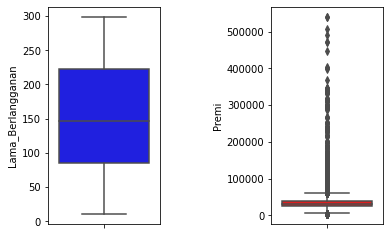

In [286]:
def cekout_en(data):
  plt.figure(figsize=(60,60))
  f, axes = plt.subplots(1,2)
  sns.boxplot(y= data['Lama_Berlangganan'],ax=axes[0],color='blue')
  sns.boxplot(y= data['Premi'],ax=axes[1],color='Red')
  plt.subplots_adjust(wspace=1)

cekout_en(datacluster)

In [287]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
df = normalize.fit_transform(datacluster)

df

array([[-0.67232958, -0.15005241],
       [ 0.07040976, -0.28342921],
       [-0.40445637,  0.13142112],
       ...,
       [ 0.89838148,  1.1497282 ],
       [ 1.43412789, -0.00201552],
       [-1.31766048,  0.35563058]])

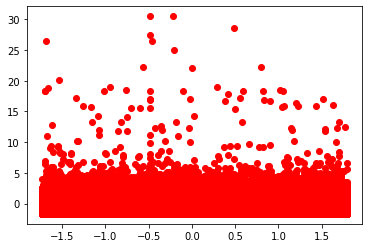

In [288]:
plt.scatter(df[:,0],df[:,1],color = 'red',label='unclustered data')
plt.show()

In [289]:
def k_means(x,k, no_iteration):
  idx = np.random.choice(len(x),k)
  EucledianDistance = np.array([]).reshape(x.shape[0],0)
  centroids = x[idx,:]

  for i in range(k):
    temp0ust = np.sum((x-centroids[i])**2,axis = 1)
    EucledianDistance= np.c_[EuclideanDistance, temp0ist]

  points = np.array([np.argmin(1) for i in EucledianDistance])

  for _ in range(no_iteration):
    centroids = []
    EuclideanDistance = np.array([]).reshape(x.shape[0],0)
    for idx in range (k):
      temp_cent=x[points==idx].mean(axis=0)
      centroids.append(temp_cent)

    centroids = np.vstack(centroids)

    for i in range(k):
      temp0ist = np.sum((x-centroids[i])**2,axis =1)
      EuclideanDistance = np.c_[EuclideanDistance,temp0ist]

    points = np.array([np.argmin(i) for i in EuclideanDistance])

  return points,controls

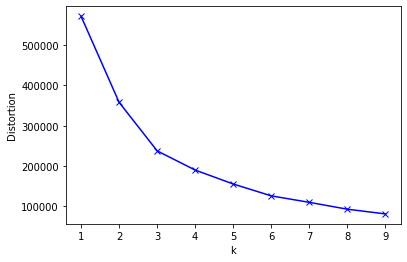

In [290]:
from sklearn.cluster import KMeans
Sillhouete = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans (n_clusters=k, max_iter = 300)
  kmeanModel.fit(df)
  distortion.append(kmeanModel.inertia_)

plt.plot(K,Sillhouete, 'bx-')
plt.xlabel('k')
plt.ylabel('Sillhouete')
plt.show()